In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

# Bevezetés

Két független változó:

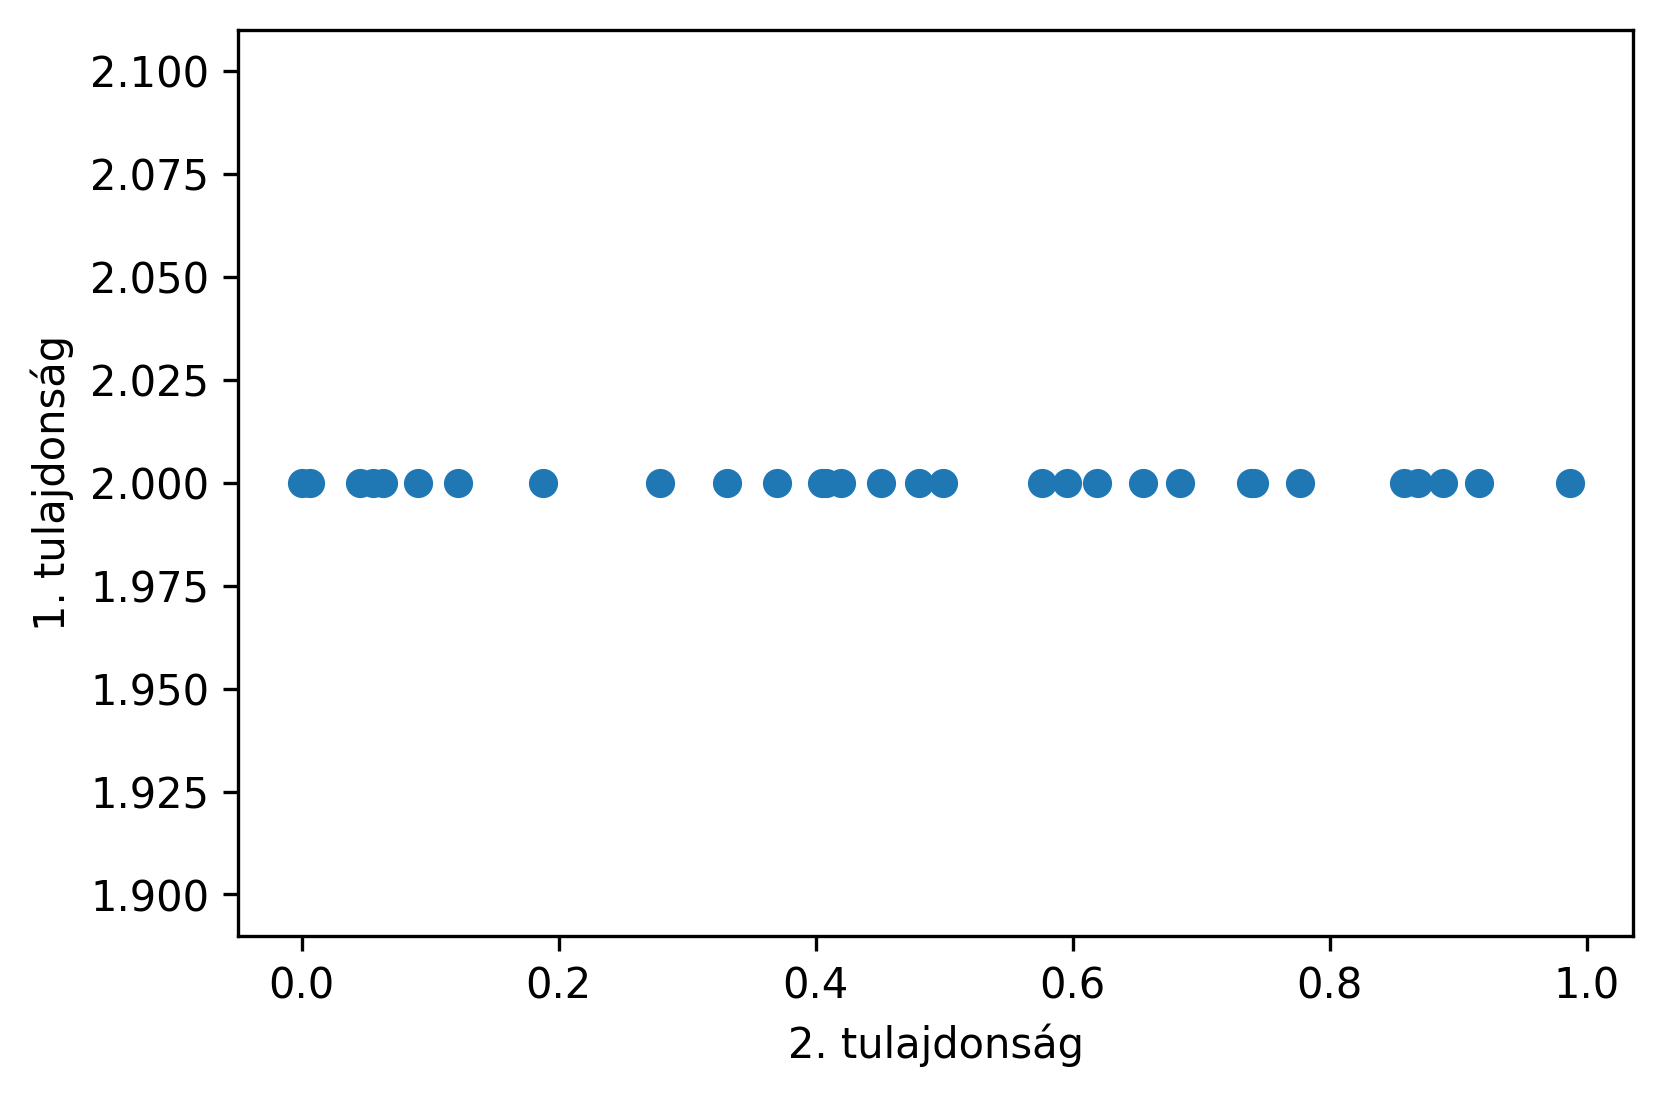

In [2]:
size = 30
x = np.random.uniform(0,1, size=size)
y = np.full((size), 2)

plt.clf()
plt.scatter(x,y)
plt.xlabel("2. tulajdonság")
plt.ylabel("1. tulajdonság")
plt.show()

Nem független változok:

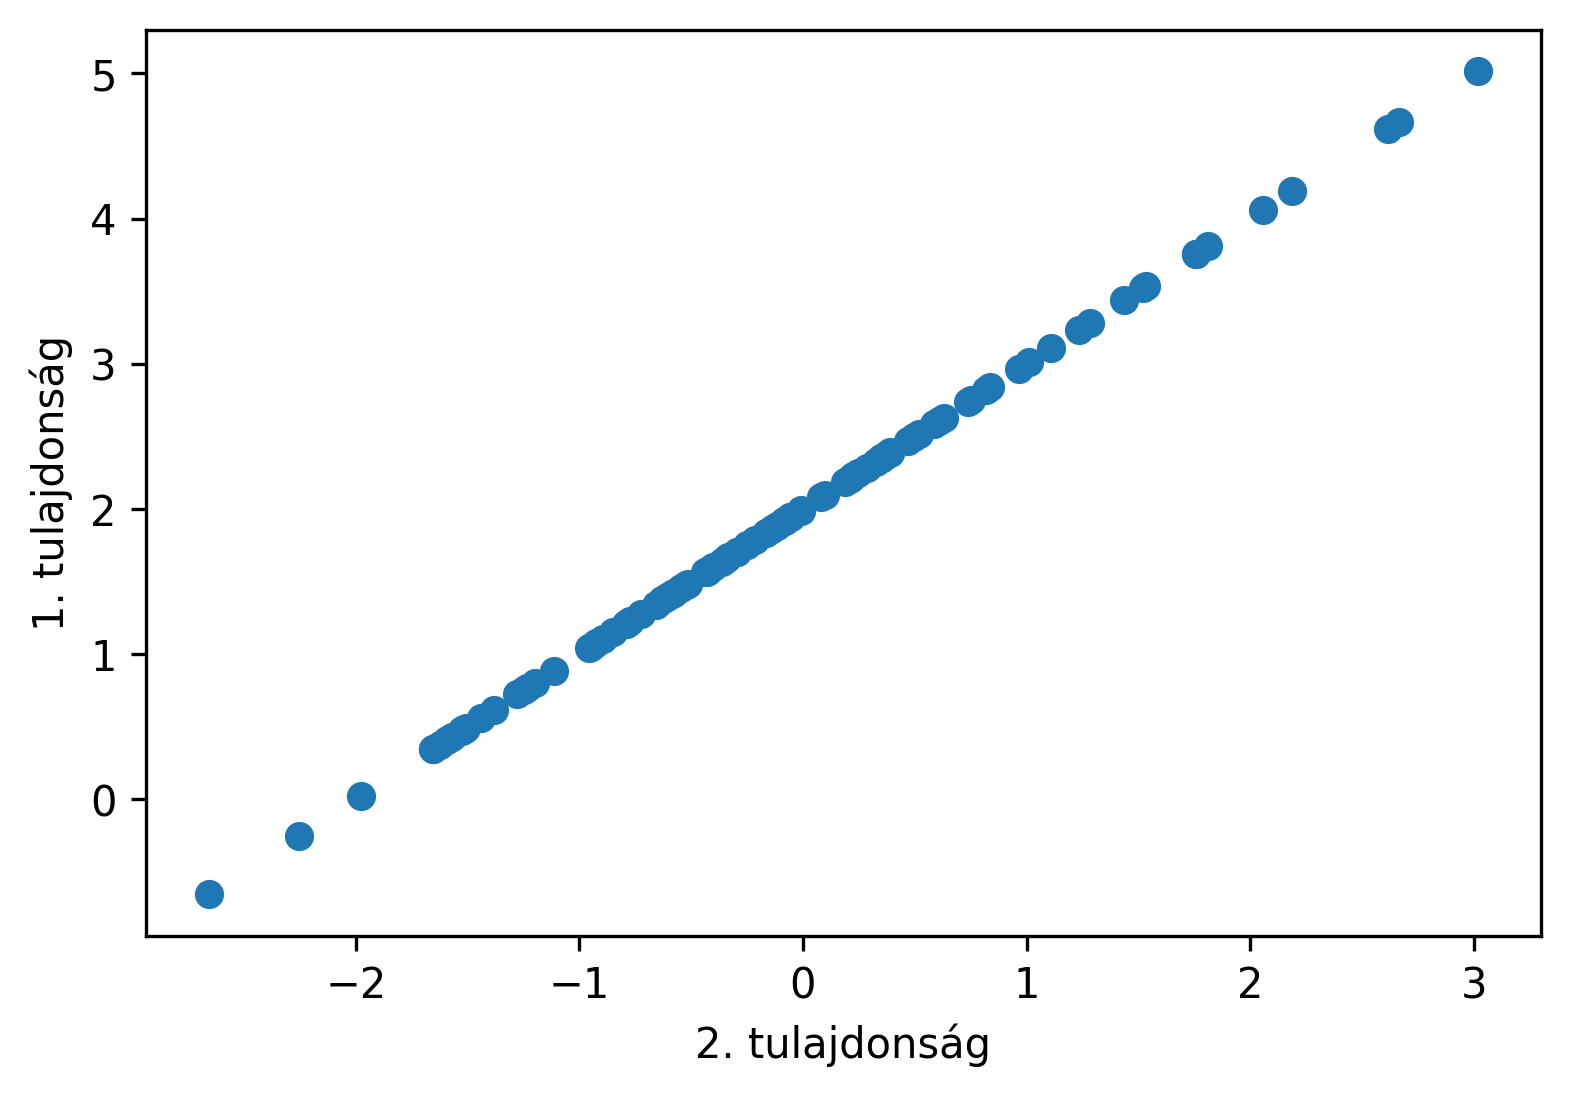

In [3]:
size = 100
x = np.random.normal(0,1, size=size)
y = 2+x

plt.clf()
plt.scatter(x,y)
plt.xlabel("2. tulajdonság")
plt.ylabel("1. tulajdonság")
plt.show()

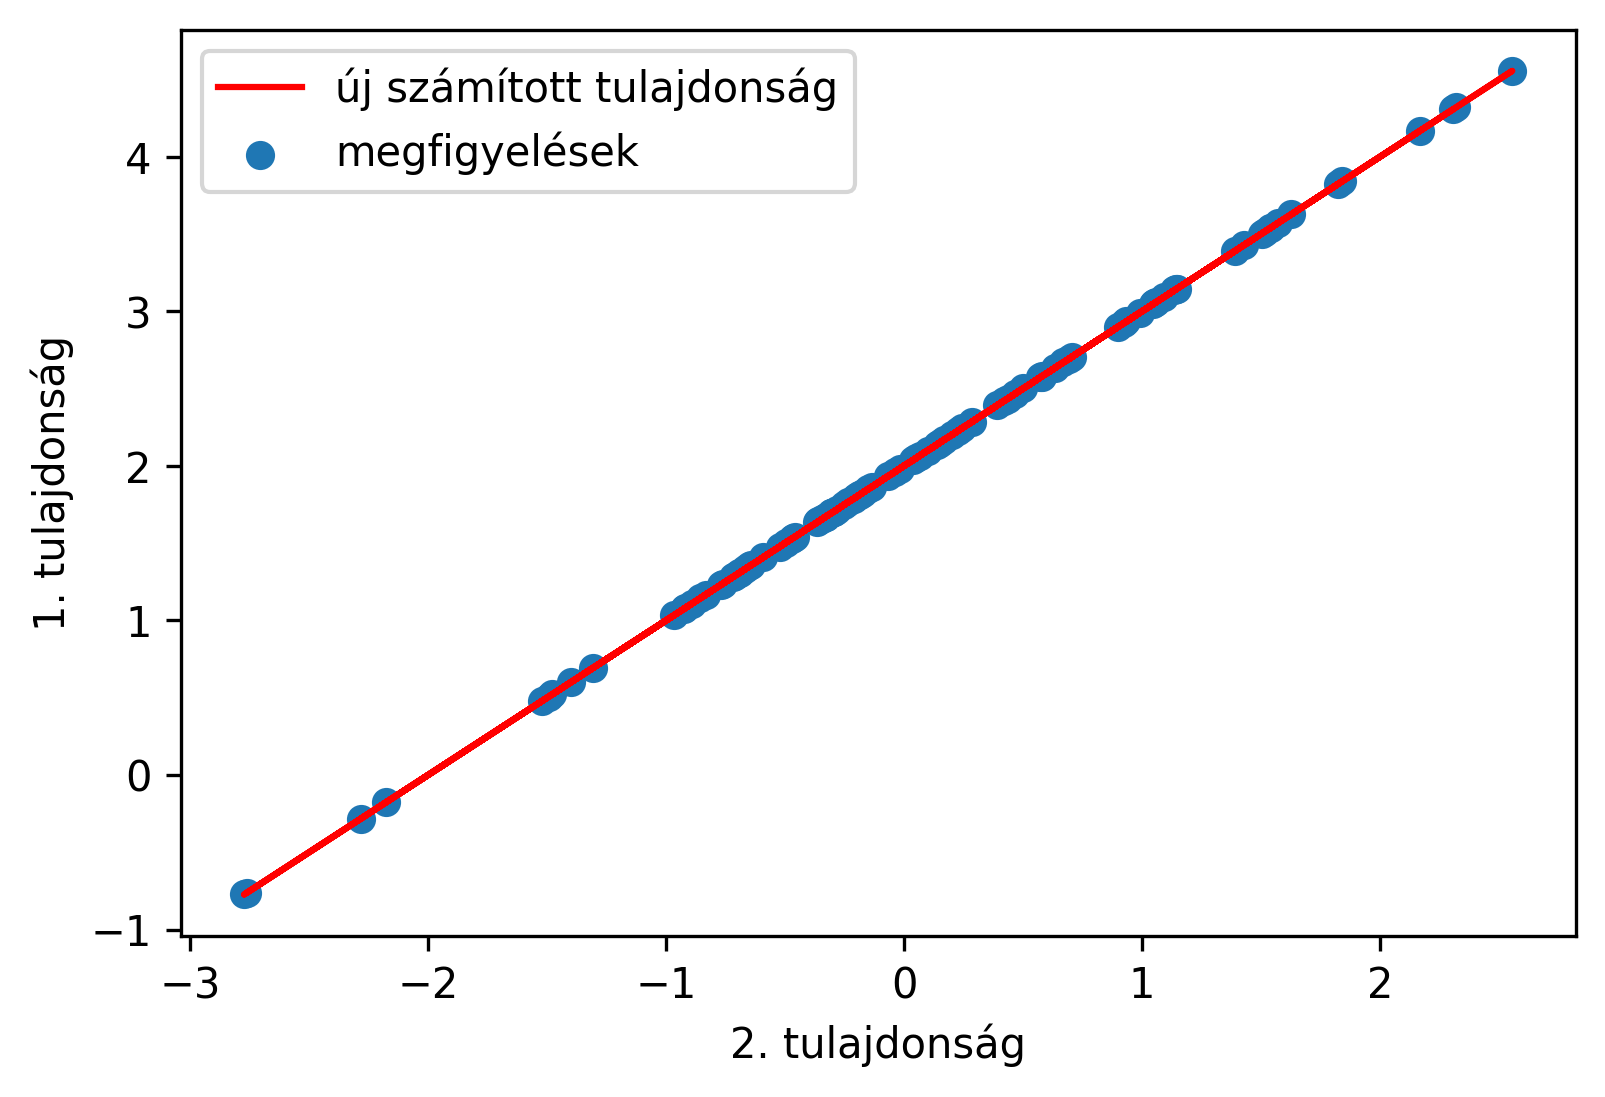

In [4]:
size = 100
x = np.random.normal(0,1, size=size)
y = 2+x

plt.clf()
plt.scatter(x,y, label="megfigyelések")
plt.plot(x,y, label="új számított tulajdonság", color="r")
plt.xlabel("2. tulajdonság")
plt.ylabel("1. tulajdonság")
plt.legend()
plt.show()

## 1. Létrehozzuk a adathalmazt

In [5]:
X = np.array([
    [8,4],
    [2,8],
    [3,1],
    [9,7]
    ])
d = X.shape[1]
n = X.shape[0]

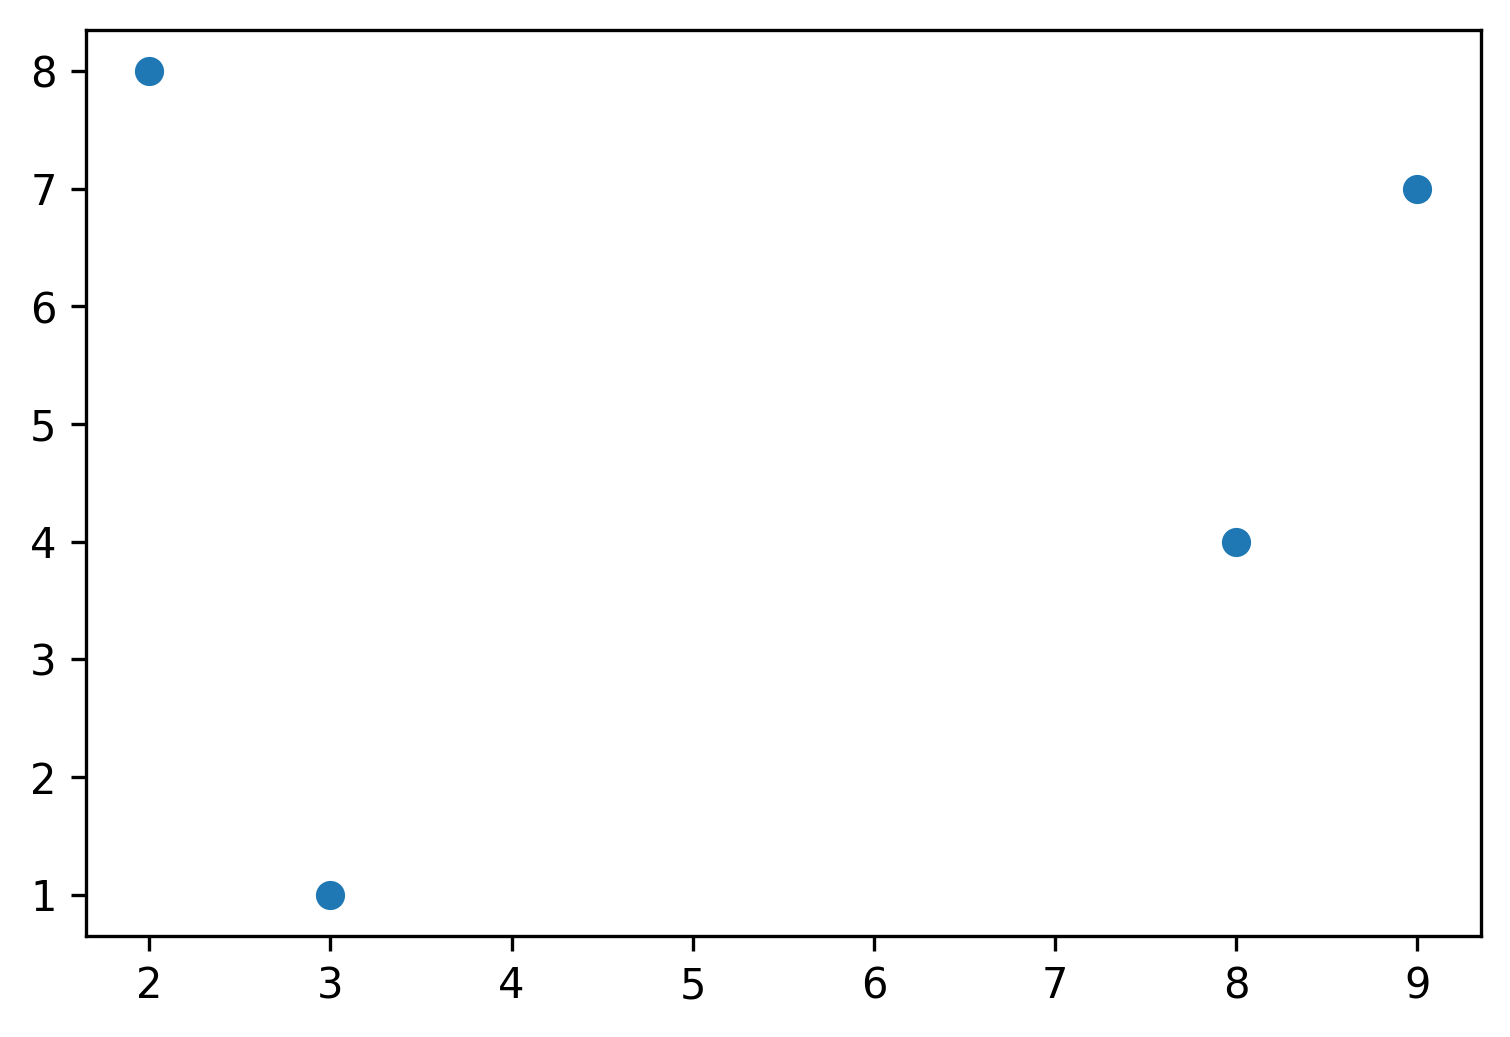

In [6]:
plt.clf()
plt.scatter([ x[0] for x in X ], [ x[1] for x in X ] )
plt.show()

## 2. Minta átlaga

Numpy számítás

In [7]:
barx = np.mean(X, axis=0)
barx

array([5.5, 5. ])

Számítás mátrix algebrával

In [8]:
# egység vektor
egy = np.ones(n)
barx = 1/n * np.dot(X.T, egy)
barx

array([5.5, 5. ])

## 3. Minta kovarianciája

numpy megvalosítás

In [9]:
print(3/4*np.cov(X.T))

[[9.25 1.  ]
 [1.   7.5 ]]


mátrix algebra megvalosítás

In [10]:
I = np.identity(n)

S = (1/n) * np.dot(np.dot(X.T, I-1/n*egy*egy.T), X) 
print(S)

[[9.25 1.  ]
 [1.   7.5 ]]


## 4. Sajátvektor és sajátérték

In [20]:
# dekompozitation 
D, P = np.linalg.eig(S)

D = np.diag(D)
print(D)
print(P)

[[9.70376823 0.        ]
 [0.         7.04623177]]
[[ 0.91063291 -0.41321628]
 [ 0.41321628  0.91063291]]


$$
\mathbf{S} = P D P^ T
$$

In [12]:
print(np.dot(P,np.dot(D, P.T)))

[[9.25 1.  ]
 [1.   7.5 ]]


## 5. Adatok átalakítása

Ehez csak egy egyszerű [Rotation matrix](https://en.wikipedia.org/wiki/Rotation_matrix) szügséges.

In [21]:
pca_X = np.dot(P.T, (X-barx).T).T
print(pca_X)

[[ 1.863366   -1.94367362]
 [-1.94756635  4.17815573]
 [-3.92944741 -2.60949095]
 [ 4.01364776  0.37500884]]


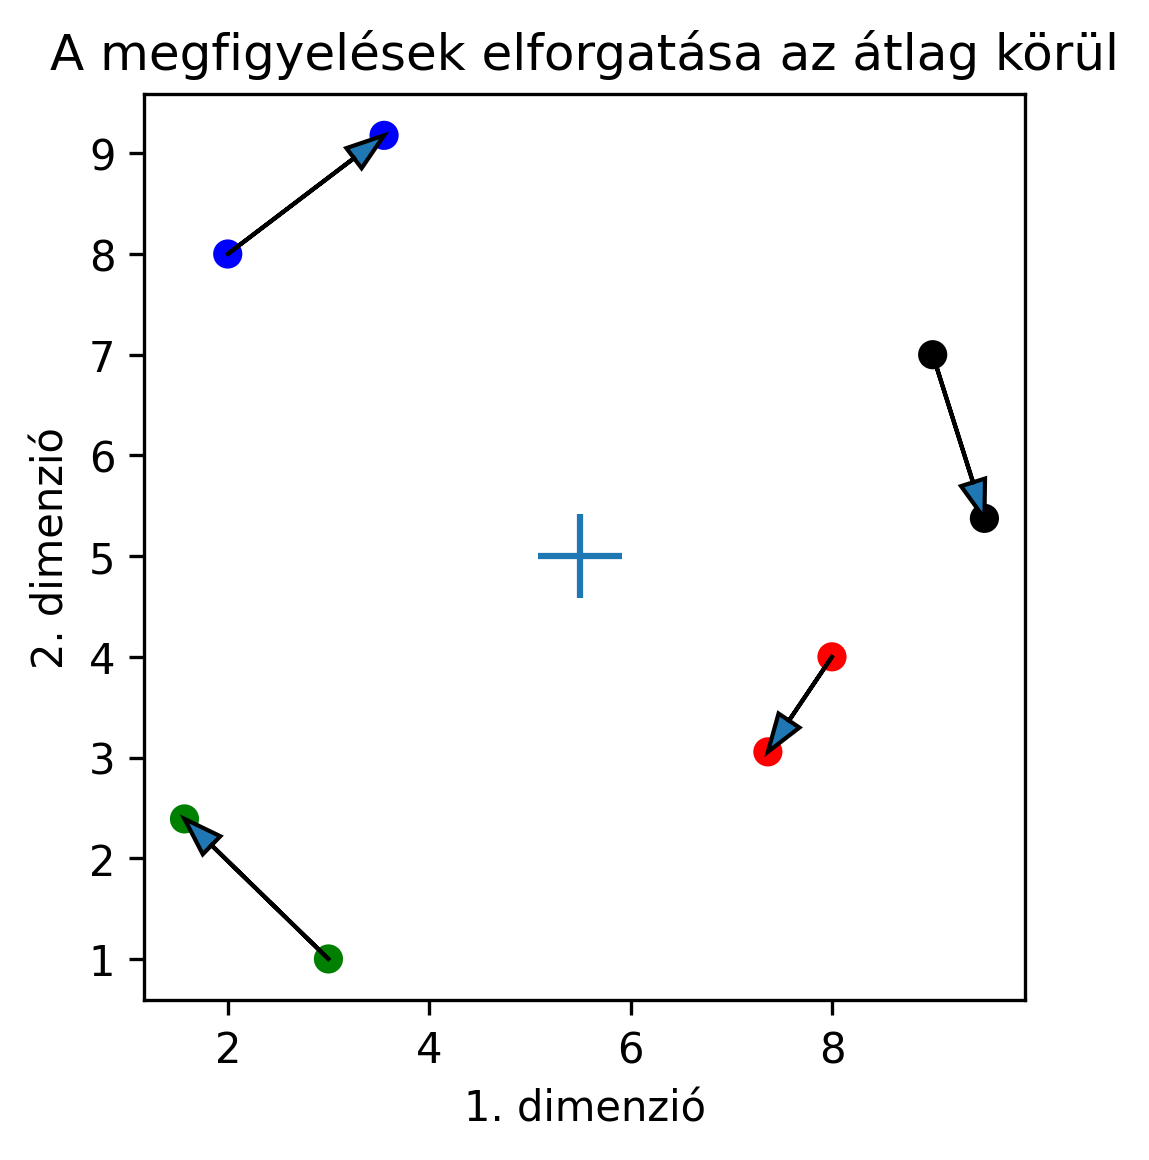

In [14]:
forgatott_X = pca_X+barx
plt.clf()
plt.scatter([ x[0] for x in X ], [ x[1] for x in X ], color=['r','b', 'g', 'black'] )
plt.scatter([ x[0] for x in forgatott_X ], [ x[1] for x in forgatott_X ], color=['r','b', 'g', 'black'] )
for i in range(len(X)):
    plt.arrow(X[i][0], X[i][1], 
              forgatott_X[i][0]-X[i][0], 
              forgatott_X[i][1]-X[i][1],
             head_width=0.25,
             length_includes_head=True)
plt.scatter(barx[0], barx[1], marker='+', s=400)
plt.gca().set_aspect("equal") # négyzetháló
plt.title("A megfigyelések elforgatása az átlag körül")
plt.xlabel("1. dimenzió")
plt.ylabel("2. dimenzió")
plt.show()

## Számítás sklearn használatával

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=False)

pca.fit(X)

PCA(n_components=2)

Az új pontkordináták

In [16]:
pca_x=pca.transform(X)
print(pca_x)

[[ 1.863366   -1.94367362]
 [-1.94756635  4.17815573]
 [-3.92944741 -2.60949095]
 [ 4.01364776  0.37500884]]


### Sajátvektorok

Sklearn sorokban tárolja a sajátvektorokat, mig a np.linalg.eig oszlopokban, igy el kell forgatnunk az egyiket, hogy ugyanazt kapjuk.

In [17]:
print(pca.components_.T)

[[ 0.91063291 -0.41321628]
 [ 0.41321628  0.91063291]]


### Sajátértékek

A sklearn nem skáláza az adatokat, mint mi fentebb amikor a Covariancia mátrixot használjuk. Ennek megfelelően a pca.explained_variance_ nem ugyanaz mint a mi sajátvektoraink, hanem azok konstans szorzatai. lsd: [itt](https://stackoverflow.com/questions/31909945/obtain-eigen-values-and-vectors-from-sklearn-pca)

In [18]:
for eigenvalue, eigenvector in zip(pca.explained_variance_, pca.components_):    
    print(np.dot(eigenvector.T, np.dot(S, eigenvector)))

9.70376822659183
7.046231773408168


### Ábrázoljuk

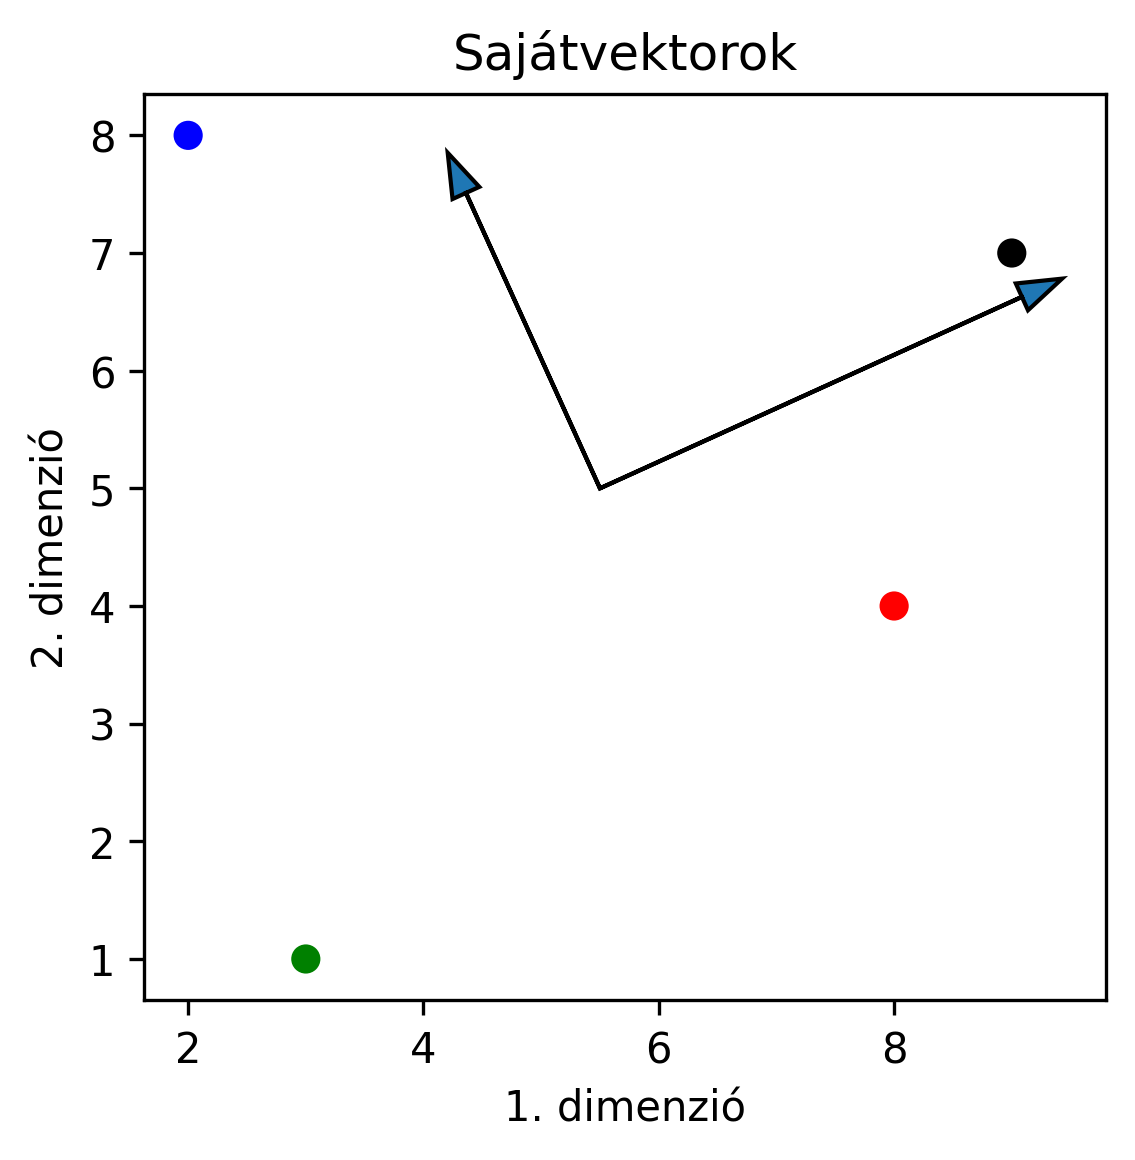

In [19]:
plt.clf()
plt.scatter([ x[0] for x in X ], [ x[1] for x in X ], color=['r','b', 'g', 'black'] )
for i in range(len(pca.components_)):
    plt.arrow(barx[0], barx[1], 
              pca.explained_variance_[i]/3*pca.components_[i][0], 
              pca.explained_variance_[i]/3*pca.components_[i][1],
             head_width=0.25,
             length_includes_head=True)
plt.gca().set_aspect("equal") # negyzetháló
plt.title("Sajátvektorok")
plt.xlabel("1. dimenzió")
plt.ylabel("2. dimenzió")
plt.show()